In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

2025-04-18 15:32:16.478684: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744965136.504975   59688 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744965136.512478   59688 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744965136.533145   59688 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1744965136.533183   59688 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1744965136.533187   59688 computation_placer.cc:177] computation placer alr

# Specify Paths

In [2]:
dataset = 'model/point_history_classifier/point_history.csv'
model_save_path = 'model/point_history_classifier/point_history_classifier.keras'

# Set Number of Classes

In [3]:
NUM_CLASSES = 5

# Input Length

In [4]:
TIME_STEPS = 16
DIMENSION = 2

# Load Training Data

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Build Model

In [8]:
use_lstm = False
model = None

if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )), 
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION]),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

/mnt/01DB783D25219E60/HOMEWORK/TGMT/ThiGiacPC/.venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
I0000 00:00:1744965142.368361   59688 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2434 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5


In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 24)             │           792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │            55 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,097 (4.29 KB)

 Trainable params: 1,097 (4.29 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Model Checkpoint Callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Early Stopping Callback
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# Compile Model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train Model

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


I0000 00:00:1744965144.034919   59768 service.cc:152] XLA service 0x75e7340052f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744965144.034949   59768 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2025-04-18 15:32:24.069691: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1744965144.252661   59768 cuda_dnn.cc:529] Loaded cuDNN version 90300


21/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2050 - loss: 1.6007 

I0000 00:00:1744965145.760823   59768 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.2055 - loss: 1.5988
Epoch 1: saving model to model/point_history_classifier/point_history_classifier.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.2056 - loss: 1.5986 - val_accuracy: 0.2353 - val_loss: 1.5854
Epoch 2/1000
22/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2267 - loss: 1.5771 
Epoch 2: saving model to model/point_history_classifier/point_history_classifier.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2265 - loss: 1.5747 - val_accuracy: 0.2422 - val_loss: 1.5585
Epoch 3/1000
23/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2725 - loss: 1.5482 
Epoch 3: saving model to model/point_history_classifier/point_history_classifier.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2690 - loss: 1.5452 - val_accuracy: 0.2651 - val_loss: 1.5199
Epoch 4/1000
22/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2410 - loss: 1.5192 
Epoch 4: saving model to model/point_history_classifier/po

In [13]:
# Load Saved Model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference Test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
[1.6974433e-15 9.4704270e-01 4.4336165e-03 4.3138240e-02 5.3854263e-03]
1


# Confusion Matrix

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


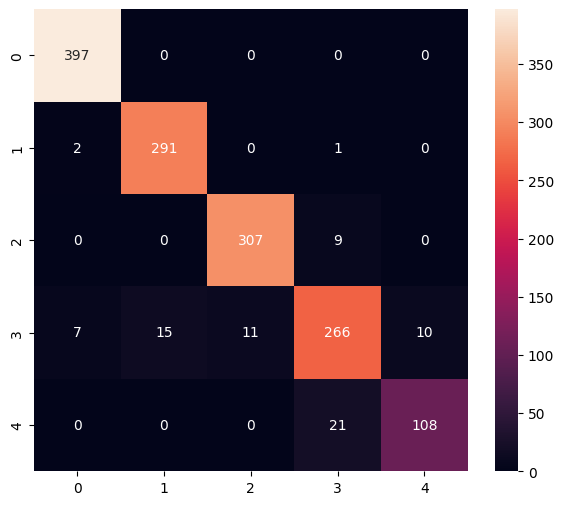

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       397
           1       0.95      0.99      0.97       294
           2       0.97      0.97      0.97       316
           3       0.90      0.86      0.88       309
           4       0.92      0.84      0.87       129

    accuracy                           0.95      1445
   macro avg       0.94      0.93      0.94      1445
weighted avg       0.95      0.95      0.95      1445



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert Model for TensorFlow Lite

In [16]:
# Save Model for Inference Only
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [17]:
tflite_save_path = 'model/point_history_classifier/point_history_classifier.tflite'

In [18]:
# Convert Model (Quantization)
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmpqn28zlmv/assets


INFO:tensorflow:Assets written to: /tmp/tmpqn28zlmv/assets


Saved artifact at '/tmp/tmpqn28zlmv'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  129639629264016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  129639629265360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  129639629264592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  129639629266512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  129639629265552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  129639629267472: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1744965188.549982   59688 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1744965188.550006   59688 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-04-18 15:33:08.550331: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpqn28zlmv
2025-04-18 15:33:08.550914: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-04-18 15:33:08.550924: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmpqn28zlmv
I0000 00:00:1744965188.555565   59688 mlir_graph_optimization_pass.cc:425] MLIR V1 optimization pass is not enabled
2025-04-18 15:33:08.556274: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-04-18 15:33:08.576537: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmpqn28zlmv
2025-04-18 15:33:08.583626: I tensorflow/cc/saved_model/loader.cc:471] SavedModel 

6488

# Inference Test

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

/mnt/01DB783D25219E60/HOMEWORK/TGMT/ThiGiacPC/.venv/lib/python3.12/site-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [20]:
# Get Input and Output Tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'serving_default_input_layer:0', 'index': 0, 'shape': array([ 1, 32], dtype=int32), 'shape_signature': array([-1, 32], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
%%time
# Perform Inference
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 211 μs, sys: 54 μs, total: 265 μs
Wall time: 184 μs


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.6974367e-15 9.4704270e-01 4.4336161e-03 4.3138240e-02 5.3854268e-03]
1
